# Chapter6 학습 관련 기술들

- 가중치 매개변수의 최적값을 탐색하는 최적화 방법
- 가중치 매개변수 초깃값
- 하이퍼파라미터 설정 방법
- 오버피팅 대비 가중치 감소와 드랍아웃 등 정규화
- 배치 정규화

## 6.1 매개변수 갱신

- 신경망 학습의 목적은 손실 함수의 값을 가능한 낮추는 매개변수를 찾는것
  
  => 매개변수의 최적값을 찾는 것 = 최적화

---
지금까지 매개변수 최적값을 찾는 단서로 매개변수의 기울기(미분)을 이용했다.

기울기를 구하고 기울어진 방향으로 값을 갱신하는 **확률적 경사 하강법(SGD)**을 사용했는데 SGD에 대한 개념과 단점, 다른 최적화 기법들을 알아보겠다

### 6.1.2 확률적 경사 하강법(SGD)

![이미지](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FTMBVh%2Fbtq4q21Bysy%2FsM2XZperlMBe9OgdaBJPD1%2Fimg.png)

 확률적 경사 하강법(SGD) : 매개변수의 기울기를 구하여 기울어진 방향으로 매개변수 값을 갱신하는 것


- W는 갱신할 가중치 매개변수 
- aL/aW은 W에 대한 손실함수의 기울기 , n은 학습률
- <--는 우변의 값으로 좌변의 값을 갱신한다는 뜻

In [4]:
!git clone https://github.com/WegraLee/deep-learning-from-scratch.git

Cloning into 'deep-learning-from-scratch'...
remote: Enumerating objects: 826, done.
remote: Total 826 (delta 0), reused 0 (delta 0), pack-reused 826
Receiving objects: 100% (826/826), 52.21 MiB | 56.28 MiB/s, done.
Resolving deltas: 100% (477/477), done.


In [1]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

### 6.1.3  SGD의 단점

![이미지](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FbfbTh5%2Fbtq4o8aEYhD%2FdXrYfF3fG22C5DHB0kqS20%2Fimg.png)

- 위 그림에서 y축 방향은 가파른데 x축 방향은 완만하다

- 최솟값이 되는 장소는 (0,0)이지만, 기울기 대부분은 그곳을 가리키지 않음

- 탐색과정을 시각화해보면 갱신 경로가 상당히 비효율적으로 움직인다

=> SGD의 단점은 비등방성 함수(방향에 따라 기울기(성질)가 달라지는 함수)에서는 탐색경로가 비효율적이라는 것이다

### 6.1.4 모멘텀

![ㅇ](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSNpHWwbR0BgWHHVIIIb8lcKnwp6ZE0sJGHzZovziiwY5PIuJY5hCEazsEMQU6J5iUfRMI&usqp=CAU)

- W는 갱신할 가중치 매개변수
- aL/aW는 W에 대한 손실 함수의 기울기 
- n은 학습률
- v는 속도

In [2]:
import numpy as np 

class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum 
        self.v = None

    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

![d](https://blog.kakaocdn.net/dn/8yYW9/btq3UcJ3Ag3/IuIZQ5TzQO896jcBvo26x1/img.png)

- SGD에 비해 비효율적인 움직임이 줄어듬을 볼 수 있다
- 왜 이렇게 나올까?? => x축의 힘은아주 작지만 방향은 변하지 않아서 한 방향으로 일정하게 가속하기 때문
- 하지만 y축의 힘은 크지만 위아래로 번갈아 받아서 상충하여 y축 방향의 속도는 안정적이지 않다

### AdaGrad

- **신경망 학습에서는 학습률이 중요하다!!!**
- 학습률이 너무 작으면 학습 시간이 길어지고 / 너무 크면 발산하여 학습이 제대로 되지 않는다
- 학습률을 정하는 효과적 기술로 **학습률 감소**가 있다 (학습을 진행하면서 학습률 점차 줄여나감)
- 학습률을 서서히 낮추는 가장 간단한 방법은 매개변수 전체의 학습률 값을 일괄적을 낮추는 것 => AdaGrad
- AdaGrad는 각각의 매개변수에 맞춤형 값을 만들어준다

---
- AdaGrad는 과거의 기울기를 제곱하여 계속 더해가는데 학습을 진행할수록 갱신 강도가 약해진다
- 그러다 어느 순간 갱신량이 0이 되어 갱신이 되지 않게 된다
- 이 문제를 개선한 기법이 RMSProp이다


In [3]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None

    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)

        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.squrt(self.h[key]) + 1e-7)

- 여기서 주의할 것은 마지막 줄에서 1e-7을 더해주는 것이다
- 왜 더해주느냐?? => self.h[key]에 0이 담겨있어도 0으로 나누는 상황을 막아줌

![ㅇ](https://blog.kakaocdn.net/dn/Gkqsb/btq3SukIi7J/Yd8CcLNKkX0QYosACIcqs1/img.png)

- y축 방향은 기울기가 커서 처음에 크게 움직이지만 그 큰 움직임에 비례해서 갱신 정도도 큰 폭으로 작아지도록 조정된다. 


=> y축 방향으로 갱신 강도가 빠르게 약해지고 지그재그 움직임이 줄어든다

### 6.1.6 Adam

- 모멘텀과 AdaGrad, 두 기법을 융합 => Adam
- 하이퍼파라미터의 편향 보정이 진행된다


![ㅇ](https://cael0.github.io/assets/images/2021_08_12/6_1_6.PNG)


Adam 코드는 /content/deep-learning-from-scratch/common/optimizer.py 참고
- Adam은 3개의 하이퍼파라미터를 설정한다
- a, 학습률 / 일차 모멘텀용 계수 베타1과 이차 모멘텀용 계수 베터2
- 논문에 따르면 b1=0.9, b2=0.999일 때 좋은 결과를 얻을 수 있다고 한다

### 6.1.7 어느 갱신 방법을 이용할 것인가??

![ㅇ](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FkN3PM%2FbtqDoTc1dI2%2FOD3oC8mfs612Ibk2l2HqSk%2Fimg.png)

- 문제에 따라 맞는 옵티마이저가 다름.

### 6.1.8 MNIST 데이터셋을 본 갱신 방법 비교

- /content/deep-learning-from-scratch/ch06/optimizer_compare_mnist.py

In [6]:
%cd /content/deep-learning-from-scratch

/content/deep-learning-from-scratch


Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
===========iteration:0===========
SGD:2.3170720403095237
Momentum:2.451894490584979
AdaGrad:2.3996535599173257
Adam:2.2480305890047587
===========iteration:100===========
SGD:1.5913828215580685
Momentum:0.24366439931288647
AdaGrad:0.06913177271748325
Adam:0.172296349185233
===========iteration:200===========
SGD:0.8473419948541555
Momentum:0.1596506728102372
AdaGrad:0.06057783558302007
Adam:0.11634146422045488
===========iteration:300===========
SGD:0.3982726083446787
Momentum:0.12908887297847685
AdaGrad:0.05038971548297537
Adam:0.10319966784891961
===========iteration:400===========
SGD:0.47149219316768753
Momentum:0.22731609584337437
AdaGrad:0.08353664597535859
Adam:0.1527654881235496
===========iteration:500===

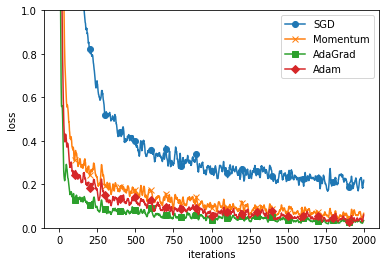

In [7]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()


## 6.2 가중치의 초깃값

### 6.2.1 초깃값이 0이면??

- 오버피팅을 억제해 범용 성능을 높이는 **가중치 감소(weight decay)**
- 가중치 감소는 가중치 매개변수의 값이 작아지도록 학습하는 방법이다 

  => 가중치 값을 작게 하여 오버피팅을 방지한다

- 가중치를 작게 만들고 싶으면 초깃값도 작은 값에서 시작 --> 0으로 설정은 안됨
- 가중치의 초깃값을 0으로 설정하면 안될까??? 

  => 안됨. 아주 안좋은 생각. 학습이 제대로 되지않는다
- 왜 0으로 하면 안될까???(정확히는 가중치를 균일한 값으로 하면 안될까??) 

  =>  오차역전파법에서 모든 가중치의 값이 똑같이 갱신되기 때문. 순전파 때 모든 뉴런에 같은 값이 입력되므로, 역전파 두번째 층의 가중치가 모두 똑같이 갱신된다는 뜻(학습이 안됨)

  => 따라서 가중치가 고르게 되는 상황을 막기위해 (가중치를 균일한 값으로 설정X) 가중치 초깃값을 무작위로 설정해야 한다

### 6.2.2 은닉층의 활성화값 분포

- 은닉층의 활성화값(활성화 함수의 출력데이터)의 분포를 관찰하면 중요한 정보를 얻을 수 있다

- 가중치 초깃값에 따라 은닉층 활성화값들이 어떻게 변화하는지를 살펴보겠다

- 시그모이드 함수 사용 5층 신경망에 무작위 생성 입력데이터를 흘리며 각 층의 활성화 값 분포를 히스토그램으로 그림

In [15]:
import numpy as np
import matplotlib.pyplot as plt 

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100) # 1000개 데이터
node_num = 100 # 각 은닉층의 노드 수
hidden_layer_size = 5 # 은닉층은 5층
activations = {} # 이곳에 활성화 결과 = 활성화값을 저장

for i in range(hidden_layer_size): # 층수만큼 반복
    if i != 0: 
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01 # 가중치 표준편차를 0.01로 바꿔서 실행
    a = np.dot(x, w)
    z= sigmoid(a)
    activations[i] = z



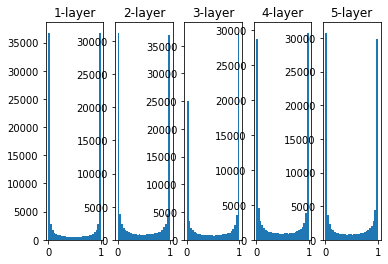

In [16]:
for i,a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + '-layer')
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

- 각 층의 활성화값들이 0과 1에 치우쳐 분포.

- 시그모이드 함수는 출력이 0 (또는 1)에 가까워지자 그 미분은 0에 다가감

 => 데이터가 0과 1에 치우쳐 분포하게 되면 역전파의 기울기 값이 점점 작아지다 사라지는 **기울기 소실(gradient vanishing)**이 발생한다

 층이 깊은 딥러닝에선 기울기 소실은 심각한 문제이다

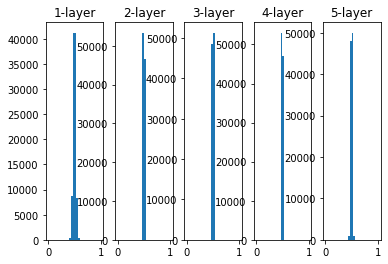

In [17]:
import numpy as np
import matplotlib.pyplot as plt 

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100) # 1000개 데이터
node_num = 100 # 각 은닉층의 노드 수
hidden_layer_size = 5 # 은닉층은 5층
activations = {} # 이곳에 활성화 결과 = 활성화값을 저장

for i in range(hidden_layer_size): # 층수만큼 반복
    if i != 0: 
        x = activations[i-1]

    # w = np.random.randn(node_num, node_num) * 1
    w = np.random.randn(node_num, node_num) * 0.01 # 가중치 표준편차를 0.01로 바꿔서 실행
    a = np.dot(x, w)
    z= sigmoid(a)
    activations[i] = z

for i,a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + '-layer')
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

- 1대신 0.01을 곱해주었을 때 0.5 부근에서 값이 집중되었다

- 기울기 소실 문제는 없으나, 활성화 값이 치우친 것은 다수의 뉴런이 거의 같은 값을 출력하고 있어서 뉴런을 여러개 둔 의미가 없다

  ex) 노드 100개가 거의 같은 값을 출력한다면 노드가 많아도 노드 하나 모델과 다를게 없음 => 활성화값들이 치우치면 표현력을 제한한다는 관점에서 문제가 됨.

---

- Xavier 초깃값 : 일반적인 딥러닝 프레임워크에서 표준적으로 이용하는 초깃값

- 앞 계층의 노드가 n개라면 표준편차가 1/sqrt(n) 분포를 사용하면 된다는 것을 이용

- 앞 층의 노드가 많을수록 대상 노드의 초깃값으로 설장하는 가중치가 좁게 퍼진다

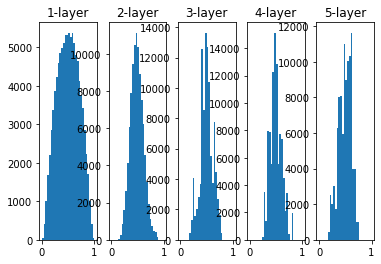

In [18]:
import numpy as np
import matplotlib.pyplot as plt 

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100) # 1000개 데이터
node_num = 100 # 각 은닉층의 노드 수
hidden_layer_size = 5 # 은닉층은 5층
activations = {} # 이곳에 활성화 결과 = 활성화값을 저장

for i in range(hidden_layer_size): # 층수만큼 반복
    if i != 0: 
        x = activations[i-1]

    # w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01 # 가중치 표준편차를 0.01로 바꿔서 실행
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    a = np.dot(x, w)
    z= sigmoid(a)
    activations[i] = z

for i,a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + '-layer')
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

- 그래프에서 1-layr에서 5-layr, 오른쪽으로 갈수록 일그러짐을 볼 수 있는데 tanh함수를 사용한다면 해결할 수 있다
- 활성화 함수용으로는 원점에서 대칭인 함수가 바람직하다고 알려져있다

### 6.2.3 ReLU를 사용할 때의 가중치 초깃값

- ReLU 이용 시에는 ReLU에 특화된 초깃값 이용할 것을 권장한다

- He 초깃값 : ReLU에 특화된 초깃값, 앞 층의 노드가 n개 일 때, 표준편차가 sqrt(2/n)인 정규분포 사용

- ReLU는 음의 영역이 0이기 때문에 더 넓게 분포시키기 위해 2배의 계수가 필요

---

- ReLU를 이용한 경우 활성화 값 분포 (std = 0.01, Xavier, He)

![ㅇ](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2F4MNLc%2Fbtq4s3Mjxso%2F2mcU5kn8XcRdqvWJyzE35K%2Fimg.png)

- std=0.01일 때의 각 층의 활성화 값들은 아주 작은 값이다

- 신경망에 아주 작은 데이터가 흐른다는 것은 역전파 때 가중치의 기울기 역시 작아져 학습이 제대로 이루어지지 않을 것이다.

- Xavier는 층이 깊어지면서 활성화값의 치우침이 조금씩 커진다 = 학습시 기울기 소실문제 일으킨다

- He초깃값은 모든 층에서 균일분포. 층이 깊어져도 분포가 균일하게 유지되기에 역전파 때도 적절한 값이 나올 것으로 예상된다

- ReLU 사용 시 He, sigmoid, tanh 등의 S자 모양 곡선에서는 Xavier초깃값 사용하는 것을 현재 모범 사례로 보고있다

### 6.2.4 MNIST 데이터셋으로 본 가중치 초깃값 비교

![ㅇ](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FbCK5KN%2Fbtq4tzEsWko%2F9l1MMwxMqIuIgi3qAjKjc1%2Fimg.png)



===========iteration:0===========
std=0.01:2.302481394325919
Xavier:2.314053910843
He:2.341094474491528
===========iteration:100===========
std=0.01:2.301836885692977
Xavier:2.237215382623678
He:1.7493660970322475
===========iteration:200===========
std=0.01:2.3017384383905943
Xavier:2.1352388103819853
He:0.8311008377243271
===========iteration:300===========
std=0.01:2.3020800399741237
Xavier:1.8822564570095743
He:0.5982264077624782
===========iteration:400===========
std=0.01:2.3020232908409515
Xavier:1.510101520657781
He:0.4562323118999355
===========iteration:500===========
std=0.01:2.3023447155101984
Xavier:0.9828684845705689
He:0.469143565301213
===========iteration:600===========
std=0.01:2.2990776724035307
Xavier:0.6216802132502544
He:0.2876314352754163
===========iteration:700===========
std=0.01:2.2992373845348135
Xavier:0.5723848195150142
He:0.33449527535756485
===========iteration:800===========
std=0.01:2.3011868892687724
Xavier:0.5019497440087874
He:0.27154127869594047
==

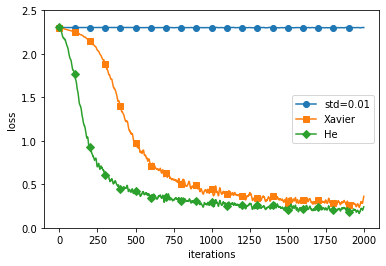

In [20]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

# 활성화 함수로 ReLU를 사용시 He 초깃값을 / sigmoid, tanh 등의 S자 모양 곡선시 Xavier 초깃값을 사용
# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

# MultiLayerNet 전체 코드 봤는데... 봐도 모르겠다 
networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],  # 딕셔너리에 이렇게 모델 객체 담는것건 신기하네...
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0: # iteration 100번 마다 iteration 횟수 print 
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys(): # 그리고 iteration 100번마다 loss 값 print
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()


- 층별 뉴런수 100개 / 5층 신경망 / 활성화 함수 = ReLU 사용

- std=0.01에서는 전혀 학습되지 않았다 (순전파 때 너무 작은 값이 흐르기 때문)

- Xavier와 He는 학습 원할, 학습 진도는 He가 더 빠르다

- **가중치 초깃값에 따라 학습의 성패가 갈리는 경우 많기에 아주 중요한 요소이다 = 초깃값 중요!**

## 6.3 배치 정규화

- 가중치 초깃값을 적절히 설정하면 각 층의 활성화값 분포가 적당히 퍼지면서 학습이 원활하게 된다
- 그렇다면 각 층이 활성화를 적당히 퍼뜨리게 강제하면 어떻게 될까???

### 6.3.1 배치 정규화 알고리즘

- 배치 정규화가 주목받는 이유
  
  1. 학습 속도 개선

  2. 초깃값에 크게 의존하지 않음

  3. 오버피팅 억제 (드롭아웃 등 필요성 감소)

![ㅇ](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FwtJei%2Fbtq4qFrVrGC%2Fkgy6kPpbCSTlcOjYDLGSjk%2Fimg.png)

ㄴ 이렇게 데이터 분포를 정규화하는 배치 정규화 계층을 신경망에 넣는다
ㄴ 배치 정규화는 미니배치를 단위로 데이터 분포가 평균이 0, 분산이 1이 되도록 정규화한다

<br/>

![2](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FplNrx%2Fbtq4sqgJ6Uy%2Fbo24IxUzGOrYCqzk7VsxZ0%2Fimg.png)

- 미니배치 B = {x1, x2 ... , xm}이라는 m개의 입력 데이터 집합에 대해 평균(uB)와 분산(a2B) 구한다

- 그리고 입력 데이터를 평균 0, 분산 1이 되도록 정규화

  (normalize 단계에서 e(삼지창기호, epsilon)는 매우 작은 값으로, 0으로 나누는 사태를 예방)

- 배치처리 층을 활성화 함수 앞 또는 뒤에 삽입하여 데이터분포가 덜 치우치게 함

- 배치 정규화 계층마다 정규화된 데이터에 고유한 확대와 이동변환 수행한다

- 단순히 평균0, 분산1로 만들어주면 활성화 함수의 비선형성이 없어질 수 있기 때문에 확대 및 이동변환 실시


### 6.3.2 배치 정규화의 효과

============== 1/16 ==============
epoch:0 | 0.116 - 0.084


/content/deep-learning-from-scratch/common/multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/content/deep-learning-from-scratch/common/multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:1 | 0.097 - 0.111
epoch:2 | 0.097 - 0.152
epoch:3 | 0.097 - 0.18
epoch:4 | 0.097 - 0.191
epoch:5 | 0.097 - 0.211
epoch:6 | 0.097 - 0.225
epoch:7 | 0.097 - 0.253
epoch:8 | 0.097 - 0.274
epoch:9 | 0.097 - 0.291
epoch:10 | 0.097 - 0.309
epoch:11 | 0.097 - 0.33
epoch:12 | 0.097 - 0.352
epoch:13 | 0.097 - 0.359
epoch:14 | 0.097 - 0.377
epoch:15 | 0.097 - 0.39
epoch:16 | 0.097 - 0.406
epoch:17 | 0.097 - 0.421
epoch:18 | 0.097 - 0.434
epoch:19 | 0.097 - 0.444


/content/deep-learning-from-scratch/common/multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/content/deep-learning-from-scratch/common/multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


============== 2/16 ==============
epoch:0 | 0.117 - 0.127
epoch:1 | 0.097 - 0.125
epoch:2 | 0.097 - 0.112
epoch:3 | 0.097 - 0.136
epoch:4 | 0.097 - 0.145
epoch:5 | 0.097 - 0.181
epoch:6 | 0.097 - 0.193
epoch:7 | 0.097 - 0.228
epoch:8 | 0.097 - 0.244
epoch:9 | 0.097 - 0.283
epoch:10 | 0.097 - 0.311
epoch:11 | 0.097 - 0.335
epoch:12 | 0.097 - 0.348
epoch:13 | 0.097 - 0.363
epoch:14 | 0.097 - 0.381
epoch:15 | 0.097 - 0.394
epoch:16 | 0.097 - 0.412
epoch:17 | 0.097 - 0.429
epoch:18 | 0.097 - 0.45
epoch:19 | 0.097 - 0.469


============== 3/16 ==============
epoch:0 | 0.098 - 0.128
epoch:1 | 0.352 - 0.108
epoch:2 | 0.453 - 0.142
epoch:3 | 0.583 - 0.177
epoch:4 | 0.65 - 0.194
epoch:5 | 0.706 - 0.223
epoch:6 | 0.744 - 0.259
epoch:7 | 0.757 - 0.286
epoch:8 | 0.817 - 0.317
epoch:9 | 0.835 - 0.361
epoch:10 | 0.875 - 0.387
epoch:11 | 0.882 - 0.419
epoch:12 | 0.904 - 0.446
epoch:13 | 0.921 - 0.484
epoch:14 | 0.924 - 0.509
epoch:15 | 0.937 - 0.523
epoch:16 | 0.941 - 0.563
epoch:17 | 0.947 - 0.599
epoch:18 | 0.959 - 0.61


epoch:19 | 0.961 - 0.618
============== 4/16 ==============
epoch:0 | 0.142 - 0.107
epoch:1 | 0.292 - 0.081
epoch:2 | 0.425 - 0.14
epoch:3 | 0.541 - 0.195
epoch:4 | 0.6 - 0.258
epoch:5 | 0.657 - 0.311
epoch:6 | 0.697 - 0.366
epoch:7 | 0.729 - 0.435
epoch:8 | 0.758 - 0.492
epoch:9 | 0.781 - 0.536
epoch:10 | 0.792 - 0.575
epoch:11 | 0.811 - 0.611
epoch:12 | 0.833 - 0.627
epoch:13 | 0.844 - 0.648
epoch:14 | 0.849 - 0.669
epoch:15 | 0.86 - 0.684
epoch:16 | 0.874 - 0.707
epoch:17 | 0.886 - 0.715
epoch:18 | 0.884 - 0.726


epoch:19 | 0.896 - 0.734
============== 5/16 ==============
epoch:0 | 0.092 - 0.112
epoch:1 | 0.097 - 0.152
epoch:2 | 0.107 - 0.275
epoch:3 | 0.113 - 0.404
epoch:4 | 0.113 - 0.515
epoch:5 | 0.115 - 0.592
epoch:6 | 0.116 - 0.644
epoch:7 | 0.115 - 0.69
epoch:8 | 0.123 - 0.713
epoch:9 | 0.128 - 0.749
epoch:10 | 0.136 - 0.772
epoch:11 | 0.142 - 0.8
epoch:12 | 0.141 - 0.808
epoch:13 | 0.14 - 0.826
epoch:14 | 0.158 - 0.838
epoch:15 | 0.175 - 0.854
epoch:16 | 0.192 - 0.864
epoch:17 | 0.196 - 0.864
epoch:18 | 0.217 - 0.876
epoch:19 | 0.224 - 0.881


============== 6/16 ==============
epoch:0 | 0.076 - 0.081
epoch:1 | 0.117 - 0.179
epoch:2 | 0.117 - 0.407
epoch:3 | 0.117 - 0.56
epoch:4 | 0.117 - 0.639
epoch:5 | 0.117 - 0.706
epoch:6 | 0.117 - 0.754
epoch:7 | 0.117 - 0.793
epoch:8 | 0.117 - 0.819
epoch:9 | 0.117 - 0.847
epoch:10 | 0.117 - 0.86
epoch:11 | 0.117 - 0.885
epoch:12 | 0.117 - 0.888
epoch:13 | 0.117 - 0.898
epoch:14 | 0.117 - 0.907
epoch:15 | 0.117 - 0.918
epoch:16 | 0.117 - 0.936
epoch:17 | 0.126 - 0.941
epoch:18 | 0.167 - 0.944


epoch:19 | 0.168 - 0.951
============== 7/16 ==============
epoch:0 | 0.139 - 0.113
epoch:1 | 0.099 - 0.343
epoch:2 | 0.136 - 0.586
epoch:3 | 0.116 - 0.69
epoch:4 | 0.116 - 0.74
epoch:5 | 0.116 - 0.778
epoch:6 | 0.116 - 0.817
epoch:7 | 0.116 - 0.838
epoch:8 | 0.116 - 0.872
epoch:9 | 0.116 - 0.893
epoch:10 | 0.116 - 0.909
epoch:11 | 0.116 - 0.922
epoch:12 | 0.116 - 0.943
epoch:13 | 0.116 - 0.951
epoch:14 | 0.116 - 0.964
epoch:15 | 0.116 - 0.967
epoch:16 | 0.116 - 0.976
epoch:17 | 0.117 - 0.98
epoch:18 | 0.116 - 0.98


epoch:19 | 0.117 - 0.982
============== 8/16 ==============
epoch:0 | 0.116 - 0.161
epoch:1 | 0.117 - 0.423
epoch:2 | 0.116 - 0.674
epoch:3 | 0.116 - 0.741
epoch:4 | 0.116 - 0.787
epoch:5 | 0.116 - 0.839
epoch:6 | 0.116 - 0.893
epoch:7 | 0.116 - 0.93
epoch:8 | 0.116 - 0.954
epoch:9 | 0.116 - 0.968
epoch:10 | 0.116 - 0.979
epoch:11 | 0.116 - 0.983
epoch:12 | 0.117 - 0.991
epoch:13 | 0.117 - 0.995
epoch:14 | 0.116 - 0.996
epoch:15 | 0.116 - 0.997
epoch:16 | 0.117 - 0.998
epoch:17 | 0.117 - 0.998
epoch:18 | 0.117 - 0.999
epoch:19 | 0.117 - 0.999


============== 9/16 ==============
epoch:0 | 0.1 - 0.098
epoch:1 | 0.116 - 0.431
epoch:2 | 0.116 - 0.748
epoch:3 | 0.116 - 0.817
epoch:4 | 0.116 - 0.86
epoch:5 | 0.116 - 0.886
epoch:6 | 0.116 - 0.894
epoch:7 | 0.116 - 0.908
epoch:8 | 0.116 - 0.964
epoch:9 | 0.117 - 0.985
epoch:10 | 0.117 - 0.995
epoch:11 | 0.117 - 0.999
epoch:12 | 0.117 - 0.993
epoch:13 | 0.117 - 0.999
epoch:14 | 0.117 - 1.0
epoch:15 | 0.117 - 1.0
epoch:16 | 0.117 - 1.0
epoch:17 | 0.117 - 1.0
epoch:18 | 0.117 - 1.0
epoch:19 | 0.117 - 1.0


============== 10/16 ==============
epoch:0 | 0.1 - 0.123
epoch:1 | 0.097 - 0.651
epoch:2 | 0.097 - 0.803
epoch:3 | 0.116 - 0.802
epoch:4 | 0.117 - 0.885
epoch:5 | 0.117 - 0.95
epoch:6 | 0.117 - 0.965
epoch:7 | 0.117 - 0.965
epoch:8 | 0.117 - 0.982
epoch:9 | 0.117 - 0.988
epoch:10 | 0.117 - 0.993
epoch:11 | 0.117 - 0.996
epoch:12 | 0.117 - 0.998
epoch:13 | 0.117 - 0.998
epoch:14 | 0.117 - 0.998
epoch:15 | 0.117 - 0.998
epoch:16 | 0.117 - 0.997
epoch:17 | 0.117 - 0.999
epoch:18 | 0.117 - 0.999
epoch:19 | 0.117 - 0.999


============== 11/16 ==============
epoch:0 | 0.117 - 0.173
epoch:1 | 0.117 - 0.56
epoch:2 | 0.117 - 0.573
epoch:3 | 0.117 - 0.744
epoch:4 | 0.117 - 0.767
epoch:5 | 0.117 - 0.777
epoch:6 | 0.117 - 0.795
epoch:7 | 0.117 - 0.777
epoch:8 | 0.117 - 0.798
epoch:9 | 0.117 - 0.805
epoch:10 | 0.117 - 0.843
epoch:11 | 0.117 - 0.908
epoch:12 | 0.117 - 0.988
epoch:13 | 0.117 - 0.914
epoch:14 | 0.117 - 0.986
epoch:15 | 0.117 - 0.972
epoch:16 | 0.117 - 0.991
epoch:17 | 0.117 - 0.905
epoch:18 | 0.117 - 0.991
epoch:19 | 0.117 - 0.995


============== 12/16 ==============
epoch:0 | 0.092 - 0.193
epoch:1 | 0.116 - 0.537
epoch:2 | 0.117 - 0.572
epoch:3 | 0.117 - 0.536
epoch:4 | 0.117 - 0.64
epoch:5 | 0.117 - 0.628
epoch:6 | 0.117 - 0.668
epoch:7 | 0.117 - 0.7
epoch:8 | 0.117 - 0.634
epoch:9 | 0.117 - 0.633
epoch:10 | 0.117 - 0.627
epoch:11 | 0.117 - 0.697
epoch:12 | 0.117 - 0.712
epoch:13 | 0.117 - 0.706
epoch:14 | 0.117 - 0.722
epoch:15 | 0.117 - 0.796
epoch:16 | 0.117 - 0.798
epoch:17 | 0.117 - 0.798
epoch:18 | 0.117 - 0.802
epoch:19 | 0.117 - 0.809


============== 13/16 ==============
epoch:0 | 0.1 - 0.113
epoch:1 | 0.116 - 0.431
epoch:2 | 0.117 - 0.494
epoch:3 | 0.117 - 0.551
epoch:4 | 0.117 - 0.563
epoch:5 | 0.117 - 0.57
epoch:6 | 0.117 - 0.59
epoch:7 | 0.117 - 0.543
epoch:8 | 0.117 - 0.593
epoch:9 | 0.117 - 0.606
epoch:10 | 0.117 - 0.552
epoch:11 | 0.116 - 0.599
epoch:12 | 0.116 - 0.58
epoch:13 | 0.117 - 0.619
epoch:14 | 0.117 - 0.617
epoch:15 | 0.117 - 0.62
epoch:16 | 0.117 - 0.62
epoch:17 | 0.117 - 0.621
epoch:18 | 0.117 - 0.621


epoch:19 | 0.117 - 0.624
============== 14/16 ==============
epoch:0 | 0.117 - 0.154
epoch:1 | 0.116 - 0.264
epoch:2 | 0.116 - 0.518
epoch:3 | 0.116 - 0.444
epoch:4 | 0.116 - 0.561
epoch:5 | 0.116 - 0.597
epoch:6 | 0.117 - 0.594
epoch:7 | 0.116 - 0.604
epoch:8 | 0.117 - 0.6
epoch:9 | 0.117 - 0.698
epoch:10 | 0.117 - 0.656
epoch:11 | 0.117 - 0.701
epoch:12 | 0.117 - 0.702
epoch:13 | 0.117 - 0.781
epoch:14 | 0.117 - 0.79
epoch:15 | 0.116 - 0.745
epoch:16 | 0.116 - 0.785
epoch:17 | 0.116 - 0.797
epoch:18 | 0.116 - 0.804


epoch:19 | 0.117 - 0.734
============== 15/16 ==============
epoch:0 | 0.092 - 0.171
epoch:1 | 0.117 - 0.369
epoch:2 | 0.117 - 0.383
epoch:3 | 0.116 - 0.385
epoch:4 | 0.116 - 0.241
epoch:5 | 0.116 - 0.388
epoch:6 | 0.116 - 0.401
epoch:7 | 0.116 - 0.399
epoch:8 | 0.116 - 0.416
epoch:9 | 0.116 - 0.42
epoch:10 | 0.116 - 0.421
epoch:11 | 0.116 - 0.43
epoch:12 | 0.117 - 0.439
epoch:13 | 0.117 - 0.423
epoch:14 | 0.116 - 0.399
epoch:15 | 0.116 - 0.486
epoch:16 | 0.116 - 0.501
epoch:17 | 0.117 - 0.501
epoch:18 | 0.117 - 0.51
epoch:19 | 0.117 - 0.511


============== 16/16 ==============
epoch:0 | 0.117 - 0.154
epoch:1 | 0.117 - 0.319
epoch:2 | 0.117 - 0.321
epoch:3 | 0.117 - 0.398
epoch:4 | 0.117 - 0.394
epoch:5 | 0.117 - 0.406
epoch:6 | 0.117 - 0.425
epoch:7 | 0.117 - 0.429
epoch:8 | 0.117 - 0.424
epoch:9 | 0.117 - 0.428
epoch:10 | 0.117 - 0.431
epoch:11 | 0.117 - 0.43
epoch:12 | 0.117 - 0.427
epoch:13 | 0.117 - 0.427
epoch:14 | 0.117 - 0.431
epoch:15 | 0.117 - 0.434
epoch:16 | 0.117 - 0.434
epoch:17 | 0.117 - 0.434
epoch:18 | 0.117 - 0.433
epoch:19 | 0.117 - 0.433


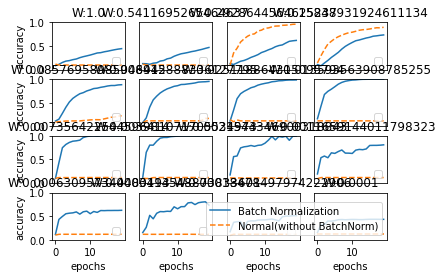

In [21]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()


![ㅇ](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FeFeQx0%2Fbtq4q2UTuzT%2F4tlpIiNVf9grAM5fmcVoq0%2Fimg.png)

- 거의 모든 경우에서 배치 정규화를 사용시 학습 진도가 빠름을 볼 수 있다
- 배치 정규화를 이용하지 않은 경우 초깃값이 잘 분포되어 있지 않으면 학습이 잘 진행되지 않는다

=> 배치 정규화를 사용하면 학습이 빨라지고, 가중치 초깃값에 크게 의존하지 않아도 된다

## 6.4 바른 학습을 위해



### 6.4.1 오버피팅

- 오버피팅은 주로 두 경우에 발생한다

  1. 매개변수가 많고 표현력이 높은 모델(피쳐가 많을 경우?)

  2. 훈련 데이터가 적음

  

In [23]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True) 
# 오버피팅을 일이키기 위해 데이터 수를 줄였다

x_train = x_train[:300]
t_train = t_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list = [100,100,100,100,100,100], output_size=10)
optimizer = SGD(lr=0.01)
max_epochs = 201
train_size = x_train.shape[0] 
batch_size = 100

train_loss = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        epoch_cnt += 1
        if epoch_cnt > max_epochs:
            break

![d](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FAdbIt%2Fbtq4rdaRhv3%2FuhZkX80y9y2c7rZits175k%2Fimg.png)

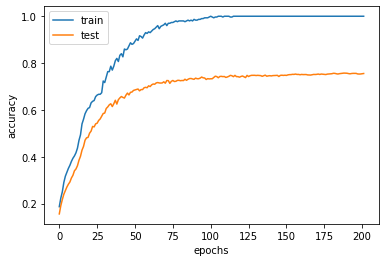

In [27]:
plt.plot(train_acc_list, label='train')
plt.plot(test_acc_list, label='test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

- 100에폭 지나는 무렵부터 정확도 변화 거의 없음 (100%의 훈련 정확도)
- 시험데이터에 대해서는 큰 차이를 보이는데 성능이 좋진않다
- 정확도가 크게 벌어지는 것은 훈련 데이터에만 적응 = 오버피팅의 결과

### 6.4.2 가중치 감소 

- 가중치 감소(weight decay) : 학습 과정에서 큰 가중치에 대해서 그에 상응하는 큰 패널티를 부과하여 오버피팅을 억제하는 방법
- 오버피팅은 가중치 매개변수의 값이 커서 발생하는 경우가 많다
- **손실함수에 가중치의 제곱노름(L2노름)을 더해** 가중치가 커지는 것 억제한다

### 신경망 학습의 목적은 손실 함수의 값을 줄이는 것!!



![ㅇ](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2Fb7mzVp%2Fbtq4uHbaoTD%2FIPtGJ2D6gfM0zMBx0VZdOK%2Fimg.png)

epoch:0, train acc:0.07333333333333333, test acc:0.0823
epoch:1, train acc:0.14333333333333334, test acc:0.1169
epoch:2, train acc:0.17, test acc:0.1476
epoch:3, train acc:0.19, test acc:0.1736
epoch:4, train acc:0.22666666666666666, test acc:0.1895
epoch:5, train acc:0.2833333333333333, test acc:0.219
epoch:6, train acc:0.30333333333333334, test acc:0.2421
epoch:7, train acc:0.33, test acc:0.2575
epoch:8, train acc:0.35333333333333333, test acc:0.2724
epoch:9, train acc:0.38666666666666666, test acc:0.2891
epoch:10, train acc:0.38666666666666666, test acc:0.2917
epoch:11, train acc:0.41333333333333333, test acc:0.3051
epoch:12, train acc:0.41, test acc:0.3022
epoch:13, train acc:0.42, test acc:0.3081
epoch:14, train acc:0.43333333333333335, test acc:0.321
epoch:15, train acc:0.44666666666666666, test acc:0.3347
epoch:16, train acc:0.44333333333333336, test acc:0.3336
epoch:17, train acc:0.44333333333333336, test acc:0.3387
epoch:18, train acc:0.43, test acc:0.3346
epoch:19, train acc:

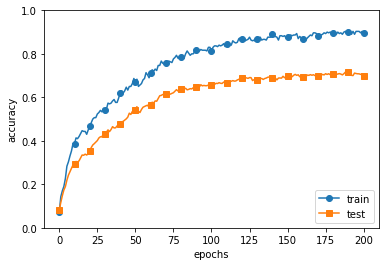

In [30]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


### 6.4.3 드롭아웃

- 가중치 감소는 간단하게 구현할 수 있고 어느 정도 지나친 학습을 억제하나 신경망 모델이 복잡해지면 가중치 감소만으로 대응하기 어려워진다
- 이럴 때 드랍아웃 기법을 사용한다

![ㅇ](https://blog.kakaocdn.net/dn/3S4jq/btrhVZcFzHi/kPnaKdMCvhHoknqgwWQ4p1/img.png)

- 드랍아웃 : 뉴런을 임의로 삭제하면서 학습하는 방법. 

  훈련 때 은닉층의 뉴런을 무작위로 골라 삭제한다. 
  
  삭제된 뉴런은 신호를 전달하지 않는다



In [31]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True): # ???? 
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask


- 여기서 핵심은 **훈련시 순전파 때마다 self.mask에 삭제할 뉴런을 False로 표시한다는 것**이다
- self.mask는 x와 형상이 같은 배열을 무작위로 생성하고, 그 값이 dropout_ratio보다 큰 원소만 True로 설정한다
- 역전파시 동작은 ReLU와 같다

train loss:2.313293577490961
=== epoch:1, train acc:0.09333333333333334, test acc:0.1085 ===
train loss:2.319052829666302
train loss:2.3080429264513334
train loss:2.2964761091018127
=== epoch:2, train acc:0.09333333333333334, test acc:0.1106 ===
train loss:2.323156055687253
train loss:2.310286828810774
train loss:2.287396127901781
=== epoch:3, train acc:0.1, test acc:0.1133 ===
train loss:2.3105230424406864
train loss:2.3154923020852363
train loss:2.2895254312032476
=== epoch:4, train acc:0.10666666666666667, test acc:0.1149 ===
train loss:2.2891682390601042
train loss:2.3075825912626966
train loss:2.2951699633359133
=== epoch:5, train acc:0.12, test acc:0.1171 ===
train loss:2.319411353973498
train loss:2.3206292406936004
train loss:2.2925191722387592
=== epoch:6, train acc:0.12666666666666668, test acc:0.1187 ===
train loss:2.2882953752272175
train loss:2.301312014696683
train loss:2.298064179810233
=== epoch:7, train acc:0.13333333333333333, test acc:0.1217 ===
train loss:2.30640288

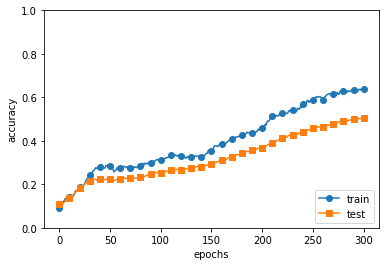

In [32]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


## 6.5 적절한 하이퍼파라미터 값 찾기

- 하이퍼파라미터 : 각 층의 뉴런수, 배치 크기, 학습률, 가중치 감소

### 6.5.1 검증 데이터 

- 범용 성능 평가시에는 시험 데이터를 사용했지만 **하이퍼파라미터의 성능을 평가할 때 시험 데이터를 사용해선 안된다**
- 왜 둘다 성능 평가인데 시험 데이터는 쓰면 안될까??? 

  => 시험 데이터를 사용해서 하이퍼 파라미터를 조정하면 하이퍼파라미터 값이 시험 데이터에 오버피팅 되기때문. 시험 데이터에 맞게 값들이 조정되므로 테스트의 의미가 사라진다

  => 하이퍼파라미터 조정용 데이터로 검증 데이터를 사용한다

---

- 훈련 데이터 : 매개변수 학습
- 검증 데이터 : 하이퍼파라미터 성능 평가
- 시험 데이터 : 신경망의 범용 성능 평가

In [34]:
from common.util import shuffle_dataset

(x_train, t_train), (x_test, t_test) = load_mnist()

# 데이터 셋 안의 데이터가 치우쳐 있을수도 있기에 데이터 분리 전에 입력 데이터와 정답 레이블을 섞는다
x_train, t_train = shuffle_dataset(x_train, t_train)

val_rate = 0.20
val_num = int(x_train.shape[0] * val_rate)

x_val = x_train[:val_num]
t_val = t_train[:val_num]
x_train = x_train[val_num:]
t_train = t_train[val_num:]

In [35]:
def shuffle_dataset(x, t):
    """데이터셋을 뒤섞는다.

    Parameters
    ----------
    x : 훈련 데이터
    t : 정답 레이블
    
    Returns
    -------
    x, t : 뒤섞은 훈련 데이터와 정답 레이블
    """
    permutation = np.random.permutation(x.shape[0])
    x = x[permutation,:] if x.ndim == 2 else x[permutation,:,:,:]
    t = t[permutation]

    return x, t

### 6.5.2 하이퍼파라미터 최적화

- 하이퍼 파라미터 최적화의 핵심은 **하이퍼파라미터의 '최적값'이 존재하는 범위를 조금씩 줄여나간다는 것**이다
- 대략적인 범위를 설정하고 그 범위에서 무작위로 값을 고르고(샘플링), 그 값으로 정확도를 평가한다 => 범위는 대략적으로 지정하는 것이 효과적.
- 실제로도 로그스케일(0.001 ~ 1000)로 지정하기도 한다
- 최적화시 학습을 위해 에폭은 작게, 1회 평가에 걸리는 시간을 단축하는 것이 효과적

--- 

> 하이퍼파라미터 최적화 단계
  
  0. 하이퍼파라미터 값의 범위 설정

  1. 설정된 범위에서 하이퍼파라미터의 값을 무작위로 추출

  2. 1단계에서 샘플링한 하이퍼파라미터 값을 사용하여 학습하고, 검증 데이터로 정확도 평가(에폭은 작게 설정)

  3. 1단계와 2단계를 특정 횟수(100회 등) 반복하며, 그 정확도의 결과를 보고 하이퍼파라미터의 범위를 좁힌다

### 6.5.3 하이퍼파라미터 최적화 구현하기

- 학습률과 가중치 감소의 세기를 조절하는 계수를 탐색하는 문제
- 0.001 ~ 1000 로그 스케일 범위에서 무작위로 추출
- 가중치 감소 계수는 1e-8 ~ 1e-4
- 학습률은 1e-6 ~ 1e-2 범위부터 시작한다

In [36]:
# 하이퍼파라미터 무작위 추출 코드
weight_decay = 10 ** np.random.uniform(-8, -4)
lr = 10 ** np.random.uniform(-6, -2)

val acc:0.09 | lr:4.125277441949833e-06, weight decay:1.660699512194164e-08
val acc:0.08 | lr:0.00016928911257748505, weight decay:1.0190025369825633e-06
val acc:0.27 | lr:0.0014656617247946892, weight decay:9.075413593251863e-06
val acc:0.09 | lr:2.661571088747877e-05, weight decay:1.068852296396231e-06
val acc:0.09 | lr:9.242641520761816e-05, weight decay:6.696925619756859e-06
val acc:0.11 | lr:1.3544697308030285e-05, weight decay:2.4968672515300595e-08
val acc:0.05 | lr:2.0315457984351194e-06, weight decay:3.056763484998934e-06
val acc:0.83 | lr:0.008746131509829773, weight decay:5.062966583307325e-05
val acc:0.4 | lr:0.0018903773131727743, weight decay:4.647622165107926e-07
val acc:0.69 | lr:0.004620213311155679, weight decay:1.894117335840615e-06
val acc:0.82 | lr:0.00816133365023775, weight decay:2.9150728194018048e-08
val acc:0.78 | lr:0.008087373027415747, weight decay:1.0166854283569264e-06
val acc:0.09 | lr:2.8928792307100792e-05, weight decay:1.9812693786993187e-05
val acc:0

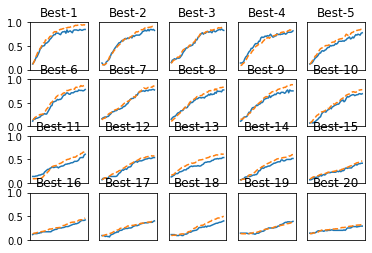

In [40]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()


## 6.6 정리

- 매개변수 갱신 방법에는 확률적 경사 하강법(SGD)외에도 모멘텀, AdaGrad, Adam 등이 있다
- 가중치 초깃값을 정하는 방법은 올바른 학습을 하는데 매우 중요하다
- 가중치 초깃값으로 자비에 초깃값과 허 초깃값이 효과적이다
- 배치 정규화를 활성화 함수 앞이나 뒤에 배치하여 학습을 진행하면 속도 개선, 초깃값 의존도 낮춤 등의 효과를 얻을 수 있다
- 오버피팅을 억제하는 정규화 기술에는 가중치 감소와 드롭아웃이 있다
- 하이퍼파라미터 값 탐색은 최적 값이 존재할 만한 범위를 점차 좁히면서 찾는 것이 효과적이다